In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
import ld_gan
from ld_gan import visualize
import numpy as np

# load data

In [3]:
X, Y = ld_gan.data_proc.data_loader.load_data(1, verbose=1, resize = 64)

100%|██████████| 102/102 [00:30<00:00,  4.92it/s]

load data from '/export/home/oblum/projects/ls_gan/data/flowers_102/jpg_128'


In [4]:
yc = np.argmax(Y, axis = 1)

# visualize

/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'ld_gan.models.enc.Enc' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'ld_gan.models.gen.Gen' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


loaded model 'projects/xf_11111_s10l.py/model/e_0650.pth'
loaded model 'projects/xf_11111_s10l.py/model/g_0650.pth'
loaded model 'projects/xf_11111_s10l.py/model/d_0650.pth'


/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'ld_gan.models.dis.Dis' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


<IPython.core.display.Javascript object>


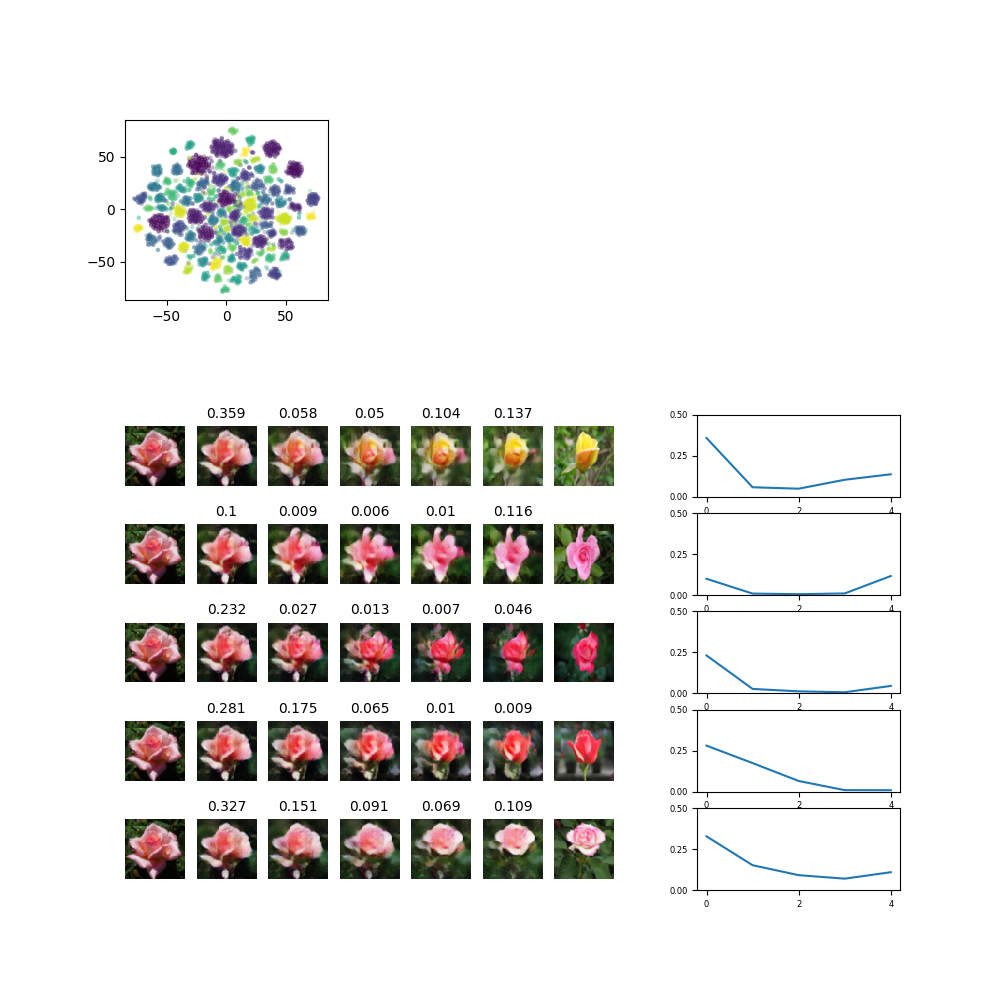

In [5]:
visualize.tiplet_nn(X, yc, 
                    "xf_11111_s10l.py", 
                    650,  
                    n_neighbors = 5,
                    sampler=None,
                    alpha = 0.3,
                    n_pts_tsne = 4000,
                    real_img_mode = "all+mean")

# check disc overfitting

In [10]:
project, epoch = "xf_11111_s10l.py", 650
enc = ld_gan.utils.model_handler.load_model(project, epoch, "enc")
gen = ld_gan.utils.model_handler.load_model(project, epoch, "gen")
dis = ld_gan.utils.model_handler.load_model(project, epoch, "dis")

loaded model 'projects/xf_11111_s10l.py/model/e_0650.pth'
loaded model 'projects/xf_11111_s10l.py/model/g_0650.pth'
loaded model 'projects/xf_11111_s10l.py/model/d_0650.pth'


In [9]:
X_flip = [np.fliplr(x) for x in X]

In [12]:
ds_flip = ld_gan.utils.model_handler.apply_models(X_flip, 500, enc, gen, dis)
ds = ld_gan.utils.model_handler.apply_models(X, 500, enc, gen, dis)

In [13]:
print "training data:", ds.mean()
print "testing data:", ds_flip.mean()

training data: 0.104961
testing data: 0.0259985
